In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics    import    r2_score

In [3]:
#reading csv file
data = pd.read_csv(r"/All data/Automobile_data.csv")
data.shape

(205, 26)

In [4]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## identify and handle misssing values

In [4]:
# convert "?" to Nan seeing in the normalized-losses column
data.replace("?", np.nan, inplace=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
#Evaluating for any missing data
missing_data=data.isnull()
missing_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### we can see that data are missing in normalized-losses, num-of-doors, bore, stroke, horsepower, pea-rpm and price column

In [6]:
#count missing values in each column
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
data.dtypes == "object"

symboling            False
normalized-losses     True
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type           True
num-of-cylinders      True
engine-size          False
fuel-system           True
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

##### Dealing with missing data
1. Drop data: (a) drop the whole columns (b) drop the whole rows
2. Replace data: (a) replace it by mean (b) replace it by frequency
3. Replace it based on other functions

In [9]:
# Repalcing "NaN" in various columns with the average of their columns
columns = ["normalized-losses", "bore", "stroke", "horsepower","peak-rpm"]
for column in columns:
    avg = data[column].astype("float").mean(axis=0)
    data[column].replace(np.nan, avg, inplace = True)
#for numerical variable

In [10]:
#Replace NAn in various columns with the most frequency class of their columns for categorical variable
data["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

#### we see that four doors are the most common type. we can also use "idxmax()" method to automatically calculate the most common type

In [11]:
data["num-of-doors"].value_counts().idxmax()

'four'

In [12]:
#replace the missing "num-of-doors" values by the most frequency
data["num-of-doors"].replace(np.nan,"four", inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
data.dropna(subset=["price"], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### let's check to see if there is any mising values again

In [14]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
#check for duplicate
data.duplicated().sum()

0

In [16]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
data[["bore", "stroke", "peak-rpm", "horsepower", "price"]]= data[["bore", "stroke", "peak-rpm", "horsepower", "price"]].astype("float")
data[["normalized-losses"]]=data[["normalized-losses"]].astype("int")

In [18]:
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data standardization
transform mpg(mile per gallon) unit to L/100km.
formular for unit conversion is L/100km = 235/mpg

In [19]:
data["city-L/100km"]= 235 / data["city-mpg"]
data["highway-L/100km"]= 235 / data["highway-mpg"]
data[["city-L/100km", "city-mpg", "highway-L/100km", "highway-mpg"]].head()

,city-L/100km,city-mpg,highway-L/100km,highway-mpg
0,11.190476,21,8.703704,27
1,11.190476,21,8.703704,27
2,12.368421,19,9.038462,26
3,9.791667,24,7.833333,30
4,13.055556,18,10.681818,22


### Data Normalization

In [20]:
#replace (original value) by (original value)/maximum value
data["length"]= data["length"]/data["length"].max()
data["width"]= data["width"]/data["width"].max()
data["height"]= data["height"]/data["height"].max()
data[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning

In [21]:
data["horsepower"].nunique()

59

In [22]:
#let's reduce the unique value of horsepower by grouping them
binwidth=(max(data["horsepower"])- min(data["horsepower"]))/4
binwidth

53.5

In [23]:
bins=np.arange(min(data["horsepower"]),max(data["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

In [24]:
#setting group names
group_names=["low","medium","high"]

In [25]:
#using the function "cut" to determine what value of "data[horsepower]" value belongs to
data["horsepower-binned"]=pd.cut(data["horsepower"], bins, labels=group_names,include_lowest=True)
data[["horsepower", "horsepower-binned"]].head(10)

,horsepower,horsepower-binned
0,111.0,medium
1,111.0,medium
2,154.0,medium
3,102.0,medium
4,115.0,medium
5,110.0,medium
6,110.0,medium
7,110.0,medium
8,140.0,medium
9,101.0,low


## Bins visualization

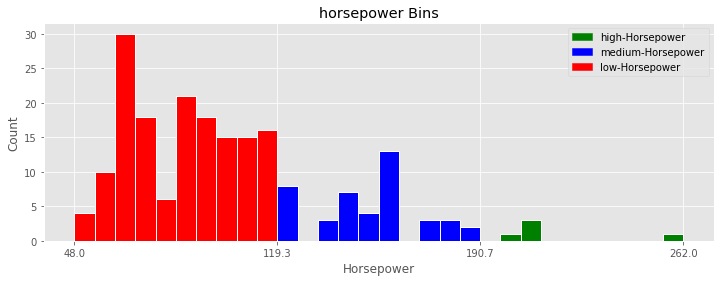

In [26]:
mpl.style.use(["ggplot"])
total_categories = 3
#let's get the x-ticks values
count, bin_edges = np.histogram(data["horsepower"], 3)
fig, ax=plt.subplots(figsize=(12,4))
N, bins, patches=ax.hist(data["horsepower"], bins=total_categories*10, edgecolor="white", linewidth=1)

for i in range(0,10):
    patches [i].set_facecolor("r")
for i in range(10,20):
    patches [i].set_facecolor("b")
for i in range(20,30):
    patches [i].set_facecolor("g")


ax.set_xticks(bin_edges)
ax.set_title("horsepower Bins")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Count")


#assigning colors to the patches
green_patch=mpatches.Patch(color="green", label="high-Horsepower")
blue_patch=mpatches.Patch(color="blue", label="medium-Horsepower")
red_patch=mpatches.Patch(color="red", label="low-Horsepower")
plt.legend(handles=[green_patch, blue_patch, red_patch])

plt.show()


###  Creating indicator variable

In [27]:
data.columns
data["fuel-type"]
#get indicator variables and assign it to data frame "dummy_varaible_1";
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [28]:
dummy_variable_1.rename(columns={"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace= True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### we now have 0 to represent "gas" and 1 to represent "diesel" in the column  "fuel-type"

In [29]:
#merge dataframe "data" and "dummy_variable_1"
data=pd.concat([data, dummy_variable_1], axis=1)

In [30]:
#drop original column "fuel-type" from data
data.drop("fuel-type", axis = 1, inplace = True)
data.head()
# we drop the fuel-type column because it has been convert from object to numerical values

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,medium,0,1


In [31]:
dummy_variable_2=pd.get_dummies(data["aspiration"])
dummy_variable_2.rename(columns={"std":"aspiration-std","turbo":"aspiration-turbo"}, inplace=True)
data=pd.concat([data, dummy_variable_2], axis=1)
data.drop("aspiration", axis=1, inplace=True)
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,medium,0,1,1,0


In [32]:
for column in data.columns:
    if data[column].dtype=="object":
        print(column.upper(), ":", data[column].nunique())
        print(data[column].value_counts().sort_values())
        print("\n")

MAKE : 22
mercury           1
renault           2
isuzu             2
chevrolet         3
alfa-romero       3
jaguar            3
porsche           4
audi              6
saab              6
plymouth          7
mercedes-benz     8
bmw               8
dodge             9
peugot           11
volvo            11
subaru           12
volkswagen       12
mitsubishi       13
honda            13
mazda            17
nissan           18
toyota           32
Name: make, dtype: int64


NUM-OF-DOORS : 2
two      86
four    115
Name: num-of-doors, dtype: int64


BODY-STYLE : 5
convertible     6
hardtop         8
wagon          25
hatchback      68
sedan          94
Name: body-style, dtype: int64


DRIVE-WHEELS : 3
4wd      8
rwd     75
fwd    118
Name: drive-wheels, dtype: int64


ENGINE-LOCATION : 2
rear       3
front    198
Name: engine-location, dtype: int64


ENGINE-TYPE : 6
rotor      4
dohc      12
l         12
ohcv      13
ohcf      15
ohc      145
Name: engine-type, dtype: int64


NUM-OF-CYLIN

### Exploratory data Analysis
finding potential continuous predictor variables for price

In [33]:
data.corr()["price"]

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
highway-L/100km      0.801118
fuel-type-diesel     0.110326
fuel-type-gas       -0.110326
aspiration-std      -0.179578
aspiration-turbo     0.179578
Name: price, dtype: float64

In [34]:
data[["price", "engine-size", "curb-weight", "highway-mpg", "peak-rpm","stroke"]].corr()["price"]

price          1.000000
engine-size    0.872335
curb-weight    0.834415
highway-mpg   -0.704692
peak-rpm      -0.101616
stroke         0.082269
Name: price, dtype: float64

#### from the above results it can be concluded that engine-size and curb-weight have strong positive linear relationship; highway-mpg has strong negative linear relationship while peak-rpm and stroke have weak linear relationship with price

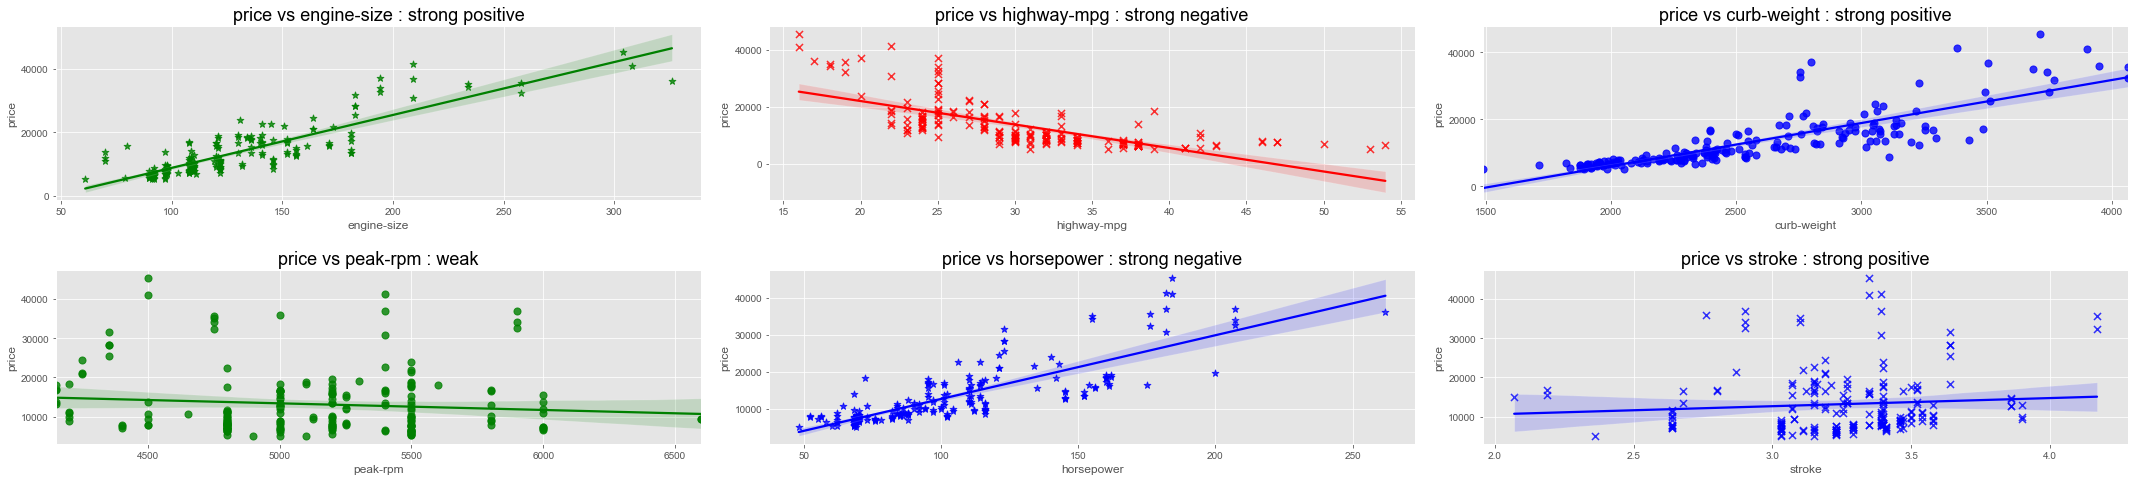

<Figure size 432x288 with 0 Axes>

In [35]:
#visualizing the linear relationship for possible predictor variables
fig=plt.figure(figsize=(30,10))
ax0=fig.add_subplot(3,3,1)
ax1=fig.add_subplot(3,3,2)
ax2=fig.add_subplot(3,3,3)
ax3=fig.add_subplot(3,3,4)
ax4=fig.add_subplot(3,3,5)
ax5=fig.add_subplot(3,3,6)
sns.set(font_scale=1.5)

#subplot 1
sns.regplot(x="engine-size", y="price", data=data, color="green", marker="*", scatter_kws={"s":50}, ax=ax0)
ax0.set_title("price vs engine-size : strong positive")

#subplot 2
sns.regplot(x="highway-mpg", y="price", data=data, color="red", marker="x", scatter_kws={"s":50}, ax=ax1)
ax1.set_title("price vs highway-mpg : strong negative")

#subplot 3
sns.regplot(x="curb-weight", y="price", data=data, color="blue", marker="o", scatter_kws={"s":50}, ax=ax2)
ax2.set_title("price vs curb-weight : strong positive")

#subplot 4
sns.regplot(x="peak-rpm", y="price", data=data, color="green", marker="o", scatter_kws={"s":50}, ax=ax3)
ax3.set_title("price vs peak-rpm : weak")

#subplot 5
sns.regplot(x="horsepower", y="price", data=data, color="blue", marker="*", scatter_kws={"s":50}, ax=ax4)
ax4.set_title("price vs horsepower : strong negative")

#subplot 6
sns.regplot(x="stroke", y="price", data=data, color="blue", marker="x", scatter_kws={"s":50}, ax=ax5)
ax5.set_title("price vs stroke : strong positive")

fig.tight_layout()
plt.show()
plt.savefig("correlation.jpg")



### finding potential categorical predictor variables for price
A good way to visualize categorical variables is by using boxplot

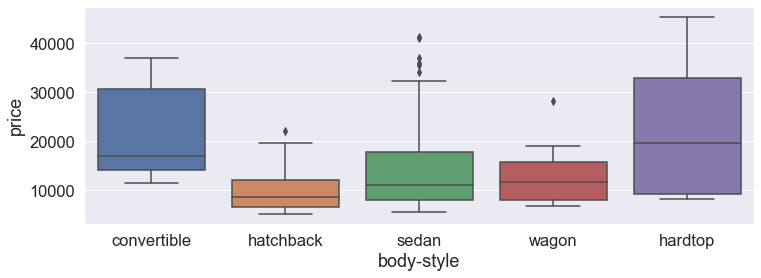

In [36]:
plt.figure(figsize=(12,4))
sns.boxplot(x="body-style", y="price", data=data)

we can see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price

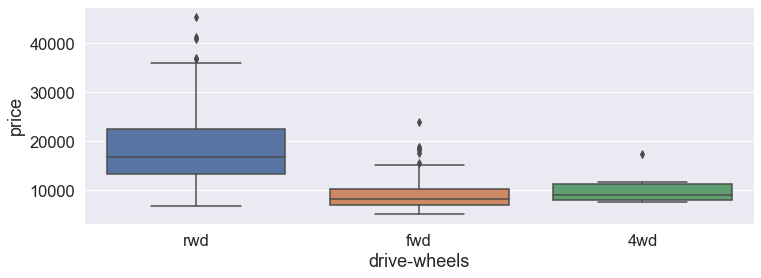

In [37]:
#let's assume drive wheel and price
plt.figure(figsize=(12,4))
sns.boxplot(x="drive-wheels", y="price", data=data)

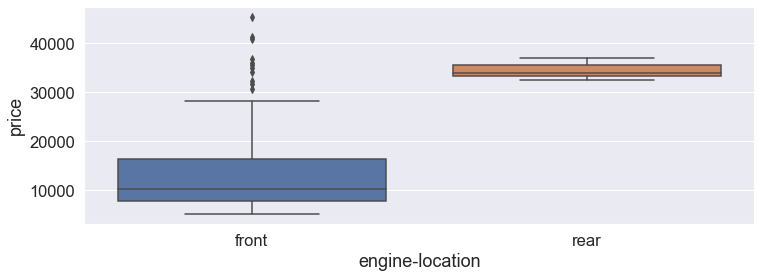

In [38]:
plt.figure(figsize=(12,4))
sns.boxplot(x="engine-location", y="price", data=data)

Engine-location is a good predictor of price

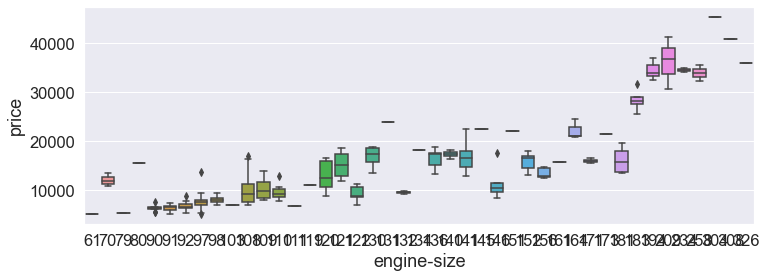

In [39]:
plt.figure(figsize=(12,4))
sns.boxplot(x="engine-size", y="price", data=data)

Descriptive Statistical Analysis

In [40]:
#this will skip variable of type object
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [41]:
#let's include variable type object
data.describe(include=["object"])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [42]:
#value_counts is a good way of understanding how many units of each characteristics variable we have.
data["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


### Group Analysis

In [43]:
# To know the type of drive wheel and body style that is most valuable
data_group=data[["drive-wheels", "body-style", "price"]]
data_group_result= data_group.groupby(["drive-wheels", "body-style"], as_index=False).mean()
data_group_result


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


let's make the grouped data into a pivot table for better visualization

In [44]:
group_pivot=data_group_result.pivot(index="drive-wheels", columns="body-style")
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [45]:
#let's fill the missing cell with value 0
group_pivot=group_pivot.fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Let's use a heat map to visualize the relationship between body style vs price

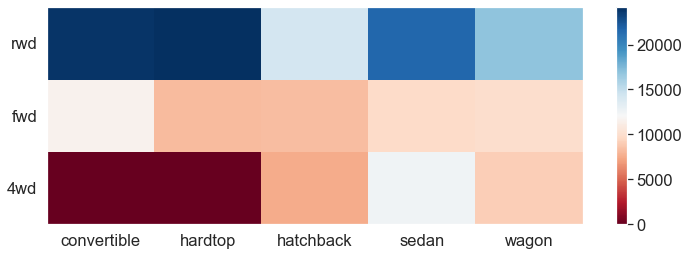

In [46]:
fig, ax=plt.subplots(figsize=(12,4))
im=ax.pcolor(group_pivot, cmap="RdBu")

#label names
row_labels=group_pivot.columns.levels[1]
col_labels=group_pivot.index
#move ticks and label to the centre
ax.set_xticks(np.arange(group_pivot.shape[1]) +0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) +0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=0)
fig.colorbar(im)
plt.show()

from the heat map,we notice that the "rwd" to convertible and hardtop are the most expensive cars.
since will fill the nan values on "4wd" row with 0 so it appears as the least car

## Correlation and Causation
(1) Correlation is the measure of the extent of interdependence between variables.
(2) Causation is the relationship between cause and effect between two variables

In [47]:
pearson_coef, p_value=stats.pearsonr(data["wheel-base"], data["price"])
print("The pearson coeficient for wheel base vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["wheel-base"], data["price"])
print("The pearson coeficient for wheel base vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["horsepower"], data["price"])
print("The pearson coeficient for horsepower vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["length"], data["price"])
print("The pearson coeficient for length vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["width"], data["price"])
print("The pearson coeficient for width vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["curb-weight"], data["price"])
print("The pearson coeficient for curb-weight vs price is", pearson_coef, "with a p-value of p =", p_value)

pearson_coef, p_value=stats.pearsonr(data["engine-size"], data["price"])
print("The pearson coeficient for engine-size vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["bore"], data["price"])
print("The pearson coeficient for bore vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["city-mpg"], data["price"])
print("The pearson coeficient for city-mpg vs price is", pearson_coef, "with a p-value of p =", p_value)


pearson_coef, p_value=stats.pearsonr(data["highway-mpg"], data["price"])
print("The pearson coeficient for highway-mpg vs price is", pearson_coef, "with a p-value of p =", p_value)




The pearson coeficient for wheel base vs price is 0.584641822265508 with a p-value of p = 8.076488270733218e-20
The pearson coeficient for wheel base vs price is 0.584641822265508 with a p-value of p = 8.076488270733218e-20
The pearson coeficient for horsepower vs price is 0.809574567003656 with a p-value of p = 6.369057428259557e-48
The pearson coeficient for length vs price is 0.6906283804483639 with a p-value of p = 8.016477466159328e-30
The pearson coeficient for width vs price is 0.7512653440522673 with a p-value of p = 9.200335510481646e-38
The pearson coeficient for curb-weight vs price is 0.8344145257702844 with a p-value of p = 2.189577238893878e-53
The pearson coeficient for engine-size vs price is 0.8723351674455185 with a p-value of p = 9.265491622198389e-64
The pearson coeficient for bore vs price is 0.5431553832626602 with a p-value of p = 8.049189483935489e-17
The pearson coeficient for city-mpg vs price is -0.6865710067844678 with a p-value of p = 2.321132065567641e-29


### Anova on Drive Wheels Variable

In [48]:
data_group=data[["drive-wheels", "price"]]
groups=data_group[["drive-wheels", "price"]].groupby(["drive-wheels"])
groups.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [49]:
groups.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [50]:
#ANOVA

f_val, p_val = stats.f_oneway(groups.get_group("fwd")["price"], groups.get_group("rwd")["price"], groups.get_group("4wd")["price"])
print("ANOVA results : F=", f_val, "P=", p_val)

ANOVA results : F= 67.95406500780399 P= 3.3945443577151245e-23


The large f-test score shows that drive wheels is important for price prediction

In [51]:
f_val, p_val = stats.f_oneway(groups.get_group("fwd")["price"], groups.get_group("rwd")["price"])
print("ANOVA results for separate fwd, rwd:F=:" , f_val, "P=", p_val) 


f_val, p_val = stats.f_oneway(groups.get_group("fwd")["price"], groups.get_group("4wd")["price"])
print("ANOVA results for separate fwd, 4wd:F=:" , f_val, "P=", p_val) 


f_val, p_val = stats.f_oneway(groups.get_group("4wd")["price"], groups.get_group("rwd")["price"])
print("ANOVA results for separate 4wd, rwd:F=:" , f_val, "P=", p_val) 


ANOVA results for separate fwd, rwd:F=: 130.5533160959111 P= 2.2355306355677845e-23
ANOVA results for separate fwd, 4wd:F=: 0.6654657502523033 P= 0.41620116697845666
ANOVA results for separate 4wd, rwd:F=: 8.580681368924756 P= 0.004411492211225333


The separate results show that the main variation of price mean values is in the fwd and rwd groups.

### MODEL DEVELOPMENT AND EVALUATION
In this stage, we will make use of the variable in drive wheels column

In [52]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned',
       'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

In [53]:
#dropping the column that are not useful for price prediction
data_new=data[["horsepower", "curb-weight", "engine-size", "highway-mpg", 
               "bore", "wheel-base", "city-mpg", "stroke", "length","width"]]

In [54]:
#splitting data into training and testing with ratio 80:20 respectively
x_train, x_test, y_train, y_test = train_test_split(data_new, data["price"], test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples :", x_train.shape[0])

number of test samples : 41
number of training samples : 160


### MULTIPLE LINEAR REGRESSION

In [55]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print("The R_square value for multiple linear regression model is:", lm.score(x_test, y_test))

The R_square value for multiple linear regression model is: 0.774261438664706


We can say that 77% of the variation of the price is explained by this model

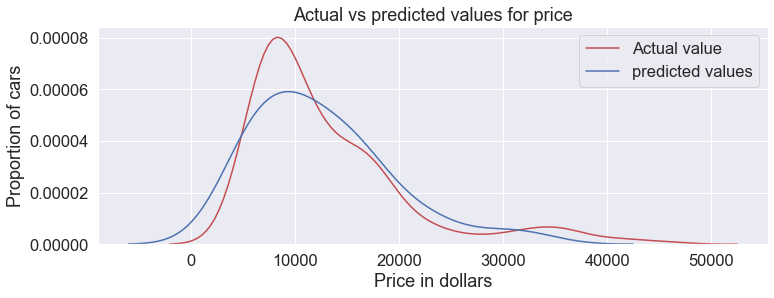

In [56]:
predicted = lm.predict(x_test)
plt.figure(figsize=(12,4))

ax1 = sns.distplot(data["price"], hist = False, color = "r", label = "Actual value")
sns.distplot(predicted, hist = False, color = "b", label = "predicted values", ax = ax1)

plt.title("Actual vs predicted values for price")
plt.xlabel("Price in dollars")
plt.ylabel("Proportion of cars")


plt.show()
plt.close()

### Polynomial linear regression

In [57]:
Input = [("scaler", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias = False)), ("model", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

### Polynomial Linear Regression Evaluation

In [58]:
print("The R_square value for polynomial linear regression model is:", pipe.score(x_test, y_test))

The R_square value for polynomial linear regression model is: 0.7507750845087007


75% of the variation of the model was explained by polynomial linear regression

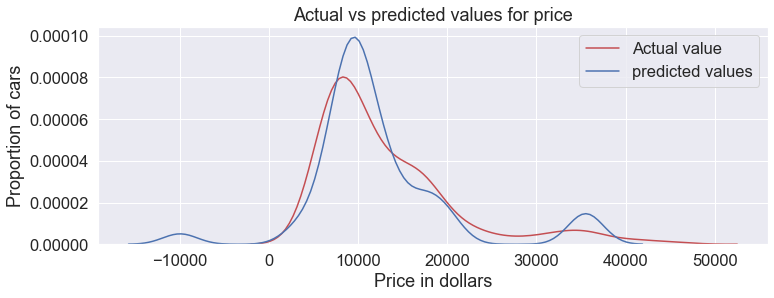

In [59]:
predicted = pipe.predict(x_test)
plt.figure(figsize=(12,4))

ax1 = sns.distplot(data["price"], hist = False, color = "r", label = "Actual value")
sns.distplot(predicted, hist = False, color = "b", label = "predicted values", ax = ax1)

plt.title("Actual vs predicted values for price")
plt.xlabel("Price in dollars")
plt.ylabel("Proportion of cars")


plt.show()
plt.close()

### Random Forest RegressionEvaluation

In [60]:
Rf = RandomForestRegressor()
Rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
print("The R_square value for Random Forest regression model is:", Rf.score(x_test, y_test))

The R_square value for Random Forest regression model is: 0.9538445517319672


We can say that 96% of the variation of the price is explained by RandomForestRegression

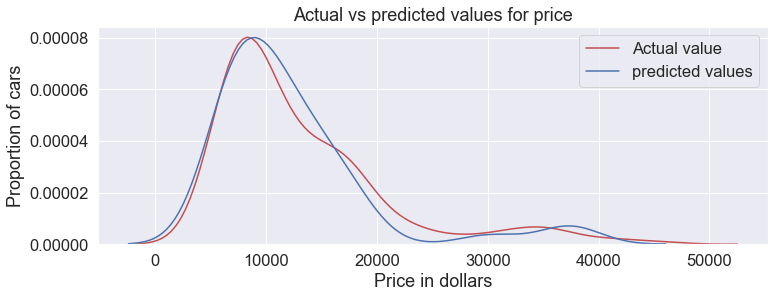

In [62]:
predicted = Rf.predict(x_test)
plt.figure(figsize=(12,4))

ax1 = sns.distplot(data["price"], hist = False, color = "r", label = "Actual value")
sns.distplot(predicted, hist = False, color = "b", label = "predicted values", ax = ax1)

plt.title("Actual vs predicted values for price")
plt.xlabel("Price in dollars")
plt.ylabel("Proportion of cars")


plt.show()
plt.close()

In [63]:
data.nunique()

symboling              6
normalized-losses     51
make                  22
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
city-L/100km          29
highway-L/100km       30
horsepower-binned      3
fuel-type-diesel       2
fuel-type-gas          2
aspiration-std         2
aspiration-turbo       2
dtype: int64